# <center>Can you hear the size of a reservoir?</center>  
<center><i>Mandatory project #2</i></center>  
<center><b>Jianing Shi, Reynel Villabona Gonzalez,Armin Hajar Sabri Sabri </b></center>
<center>Date: <b>10 10 2021</b></center>

In [1]:
# Import the packages we plan to use
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import math
import scipy.sparse.linalg
import timeit
import pandas as pd
from scipy.optimize import curve_fit

<center><b>Abstract</i></center>

The following project has as its main aim, teach us how to solve differential equations by different methods such as Dense, Sparse and Thomas.Also we reviewd how can they be solved as time dependent or independent, including the error or not as well . We improve our profficiency coding using a large simulator with a Class and many functions inside which made more efficient our time coding and also using different functions at the same time. At the end we realized that the faster method to solve symmetric tridiagonal systems is Thomas Algortihm with a 0.00028 seconds, followed by the Dense method with 0.00038671 seconds and the slowest was Spicy with 0.00229. Finnally we plot the pressures we got from the matrix and noticed that the pressure has a steady behavior when is close to the end of the reservoir. From our results we can say that the ratio of the reservoir is 7.200ft, with a volume of 7.38*10**6 cubic meters.

# Intoduction

During the last classes we learnt about how to solve the heat equation for time dependent and independet as well, in order to gain knowledge about how to solve linear systems by different methods. We saw how useful is the heat equation for big systems like the change of the temperature of the earth but also for little systems like the process of the curing of the concret.

We were set out a problem which we will solve in the following steps and it is to estimate the size of a reservoir that coints fluids in its porous. We started deriviating the equation of flow of fluids for a steady-state its means the pressure were not varying along the time. After have done this we divided the "ratio" of the reservoir in N number of grids equally spaced.

In the first part to get our first matrix we used the second derivate of the pressure in terms of distance equation using a finite difference formulation and started to evaluated in the number of grids that we have which is 4 in this case, also we we took two different cases one when the boundary condition is "Lazy" its mean the pressure in this node is equal to the exterior pressure but this is going to induce us into an error, which is gonna be solved by using the "Not lazy" method which is solve this node by a Taylor's approximation. We solve this first part using *np.linalg.solve*. We plot both solutions and compare against the analytical solution and we saw how the error was fixed by introducing the boundary condition into the diffusivity equation.

In the second part we were given equations which helped us to give a solution for a time-dependent system so we can see how the pressure have been changing with the time. We created a new matrix to solve this part and get new pressures. At this point we had started to create a Class which contains all the variables and functions needed to solve the laid out problem. Here we were ask to get the left and righ hand side of the matrix, which we did also with the same solver as the first part, but with the difference that we included a solver for the time, so we can obtain the pressure as the time goes move forward.

In the third part we were asked to solve another analytical solution which is the line-solution and compare it with our numerical solution in physical coordinates  and also use different methods to solve linear system such as Sparse and Thomas. These were included in our main Class o simulator.

Finnally in the last part, we were required to solve the pressure of the well using a Taylor's central difference method in terms of P0. We also were given some data that was collected from the well and it was compared against out numerical solution, after we plot it and see that our model was a little bit far from the taken data, we fit out model to the main curve by varying the external ratio and the permeability, therefore this allowed us to estimated the volume of the reservoir.

All the funcitons and variables were compressed in one class which made our job efficient, because every time that we needed to call an specific function we just called the class and the function that we wanted to execute, which is really usefull and organized.

# Exercise 1: Steady-state solution 

The simplest situation is when there is no pressure-variation in time, i.e., steadystate flow. Then, we can replace the partial derivatives with ordinary derivatives, and equations become:  
$$\frac{{\rm d}^2p}{{\rm d}y^2}(y)=0 \qquad{\rm for\ all\ y,} \qquad\ \,(1)$$  
$$\frac{{\rm d}p}{{\rm d}y}(y=y_w)=\alpha  \qquad\qquad\qquad(2)$$  
$$p(y=y_e)=p_{\rm init}  \qquad\qquad\qquad(3)$$  

## Part 1.

*   Show that the analytical solution to equations (1), (2), and (3) is  
$$p(y)=p_{\rm init}+\alpha(y-y_e)  \qquad\qquad(4)$$  

> According to equation (1),(2):  
$$\frac{dp}{dy}=\int0{\rm d}y={\rm constant}=\alpha$$  
$$p=\int\alpha{\rm d}y=y\cdot\alpha+{\rm constant}$$  
According to equation (3):  
$$p(y=y_e)=p_{\rm init}=y_e\cdot\alpha+{\rm constant}$$
$${\rm constant}=p_{\rm init}-y_e\cdot\alpha$$  
Hence:  
$$p(y)=y\cdot\alpha+p_{\rm init}-y_e\cdot\alpha=p_{\rm init}+\alpha(y-y_e)$$

## Part 2.

To obtain a numerical steady-state solution, we start by dividing the total flow domain into N equally-sized grid blocks in the y-coordinates, and we select the midpoint of each y-block as our grid points (see figure 1). Let pi be a short-hand notation for the pressure solution at grid point number i, i = 0, 1, . . . ,N − 1.
 ![jupyter](https://i.ibb.co/Rz6zkGP/P1.png)  
$$\,\rm {\color{grey}{Figure\,1:\ Sketch\ of\ the\ coordinate\ transformation\ r\rightarrow y.\ Note\ that\ the\ pressure\ is\ always\ evaluated\ at\ the\ center\ of\ the\ y-blocks.}}$$  

*   Approximate the second derivative of pressure in equation (1) with an appropriate finite difference formulation

> $$\frac{{\rm d}^2p}{{\rm d}y^2}(y)\approx\frac{p(y+\Delta y)+p(y-\Delta y)-2p(y)}{\Delta y^2}=\frac{p_{\rm init}+\alpha(y+\Delta y-y_e)+p_{\rm init}+\alpha(y-\Delta y-y_e)-2\cdot(p_{\rm init}+\alpha(y-y_e))}{\Delta y^2}=0$$  

* For grid point number i, write down the resulting finite difference equation in terms of the variables $p_i$. Remember to include the truncation error term.

> $$\frac{{\rm d}^2p}{{\rm d}y^2}(y_i)=\frac{p_{i+1}+p_{i-1}-2p_i}{\Delta y^2}+\mathcal O(\Delta y^2)=0\qquad\qquad(5)$$  



## Part 3.

If $p_e = p(y_e) = p_{init}$, the "lazy" option for the exterior reservoir boundary is to set  
$$p_N = p_e\qquad\qquad(6)$$

* Let $N = 4$. For the "lazy" implementation of the boundary condition at $y = y_e$, equation (6), show that the matrix equation we need to solve is  
$$\begin{pmatrix} -1 & 1 & 0 & 0 \\ 1 & -2 & 1 & 0 \\ 0 & 1 & -2 & 1 \\ 0 & 0 & 1 & -2 \end{pmatrix}\begin{pmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{pmatrix}=\begin{pmatrix} \alpha\Delta y \\ 0 \\0 \\ -p_e \end{pmatrix} $$

> According to equation (5):  
$$p_{-1}+p_1-2p_0=0$$  
$$p_0+p_2-2p_1=0$$  
$$p_1+p_3-2p_2=0$$  
$$p_2+p_4-2p_3=0$$  
Due $N=4$ and equation (6), $p_N=p_4=p_e$  
And central difference approximation to express the pressure at "the ghost node" $i = −1$ in terms of $p_0$:  
$$\frac{\rm dp}{\rm dy}\bigg|_{y = 0}=\frac{p_0-p_{-1}}{\Delta y}+\mathcal O(\Delta y)=\alpha$$  
$$\Rightarrow p_{-1}=p_0-\alpha\Delta y$$  
Hence:  
$$-p_0+p_1=\alpha\Delta y$$  
$$p_0-2p_1+p_2=0$$  
$$p_1-2p_2+p_3=0$$  
$$p_2-2p_3=-p_e$$  
$$\Rightarrow \begin{pmatrix} -1 & 1 & 0 & 0 \\ 1 & -2 & 1 & 0 \\ 0 & 1 & -2 & 1 \\ 0 & 0 & 1 & -2 \end{pmatrix}\begin{pmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{pmatrix}=\begin{pmatrix} \alpha\Delta y \\ 0 \\0 \\ -p_e \end{pmatrix} $$


## Part 4.

We can investigate the error of the "lazy" approximation formally with Taylor’s formula:  
$$p_N =p(y_e+\frac{\Delta y}{2})=p(y_e) + p'(y_e)\frac{\Delta y}{2}+\frac{1}{2}\frac{\rm d^2 p}{\rm dy^2}(\frac{\Delta y}{2})^2+\cdots$$  
In the steady state limit we see from equation (1) that $\frac{\rm d^2 p}{\rm dy^2}=0$, hence all higher-order terms are zero. Therefore, we get  
$$p_N = p_e + p'(y_e)\frac{\Delta y}{2}\qquad\qquad(7)$$  
A smarter solution for i = N − 1 is therefore to write  
$$p'(y_e) = \frac{p_N-p_{N-1}}{\Delta y}$$  
and to use equation (7) to derive a "not-so-lazy" boundary condition  
$$p_N =2p_e-p_{N-1}\qquad\qquad(8)$$  

* Let N = 4. What is the matrix equation we need to solve when using equation (8) as boundary condition?  

> Due to $N=4$ and equation (8), $p_4=2p_e-p_3$  
Hence:  
$$-p_0+p_1=\alpha\Delta y$$  
$$p_0-2p_1+p_2=0$$  
$$p_1-2p_2+p_3=0$$  
$$p_2-3p_3=-2p_e$$  
$$\Rightarrow \begin{pmatrix} -1 & 1 & 0 & 0 \\ 1 & -2 & 1 & 0 \\ 0 & 1 & -2 & 1 \\ 0 & 0 & 1 & -3 \end{pmatrix}\begin{pmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{pmatrix}=\begin{pmatrix} \alpha\Delta y \\ 0 \\0 \\ -2p_e \end{pmatrix} $$


## Part 5.

* For both implementations of the boundary condition at $y = y_e$, solve the matrix equation for $N =$ 4, 40, 400, and 4000.  
* Compare with the analytical expression, equation (19), in a single point.

When N=4 for 1st implementation
[[-1.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]
[p0,p1,...,p4]=[3891.97750305 3893.98312729 3895.98875153 3897.99437576]


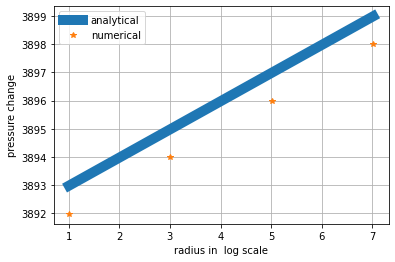

error at point 2 is=1.0028121186969656 

When N=4 for 2nd implementation
[[-1.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -3.]]
[p0,p1,...,p4]=[3892.98031517 3894.98593941 3896.99156364 3898.99718788]


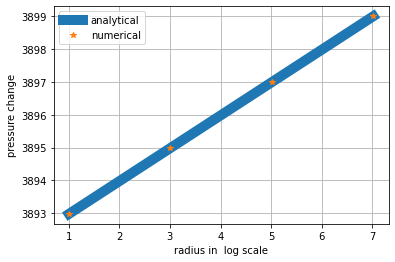

error at point 2 is=4.547473508864641e-13 

When N=40 for 1st implementation
[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[p0,p1,...,p40]=[3891.97750305 3892.17806547 3892.3786279  3892.57919032 3892.77975275
 3892.98031517 3893.18087759 3893.38144002 3893.58200244 3893.78256486
 3893.98312729 3894.18368971 3894.38425214 3894.58481456 3894.78537698
 3894.98593941 3895.18650183 3895.38706425 3895.58762668 3895.7881891
 3895.98875153 3896.18931395 3896.38987637 3896.5904388  3896.79100122
 3896.99156364 3897.19212607 3897.39268849 3897.59325092 3897.79381334
 3897.99437576 3898.19493819 3898.39550061 3898.59606303 3898.79662546
 3898.99718788 3899.19775031 3899.39831273 3899.59887515 3899.79943758]


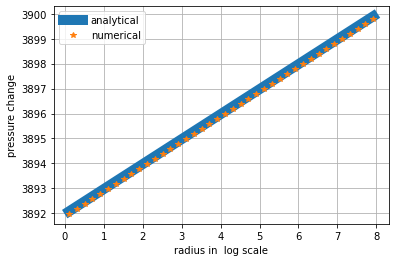

error at point 20 is=0.10028121186951466 

When N=40 for 2nd implementation
[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -3.]]
[p0,p1,...,p40]=[3892.07778426 3892.27834669 3892.47890911 3892.67947153 3892.88003396
 3893.08059638 3893.2811588  3893.48172123 3893.68228365 3893.88284608
 3894.0834085  3894.28397092 3894.48453335 3894.68509577 3894.88565819
 3895.08622062 3895.28678304 3895.48734547 3895.68790789 3895.88847031
 3896.08903274 3896.28959516 3896.49015758 3896.69072001 3896.89128243
 3897.09184486 3897.29240728 3897.4929697  3897.69353213 3897.89409455
 3898.09465697 3898.2952194  3898.49578182 3898.69634425 3898.89690667
 3899.09746909 3899.29803152 3899.49859394 3899.69915636 3899.89971879]


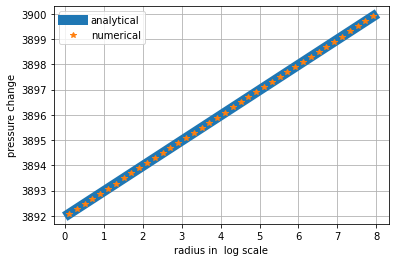

error at point 20 is=0.0 

When N=400 for 1st implementation
[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[p0,p1,...,p400]=[3891.97750305 3891.99755929 3892.01761554 3892.03767178 3892.05772802
 3892.07778426 3892.0978405  3892.11789675 3892.13795299 3892.15800923
 3892.17806547 3892.19812172 3892.21817796 3892.2382342  3892.25829044
 3892.27834669 3892.29840293 3892.31845917 3892.33851541 3892.35857166
 3892.3786279  3892.39868414 3892.41874038 3892.43879663 3892.45885287
 3892.47890911 3892.49896535 3892.51902159 3892.53907784 3892.55913408
 3892.57919032 3892.59924656 3892.61930281 3892.63935905 3892.65941529
 3892.67947153 3892.69952778 3892.71958402 3892.73964026 3892.7596965
 3892.77975275 3892.79980899 3892.81986523 3892.83992147 3892.85997771
 3892.88003396 3892.9000902  3892.92014644 3892.94020268 3892.96025893
 3892.98031517 3893.0

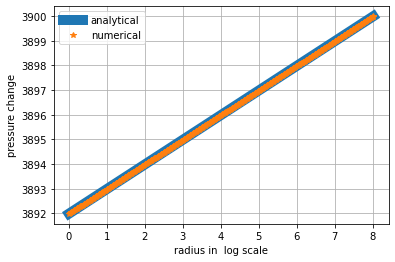

error at point 200 is=0.010028121159393777 

When N=400 for 2nd implementation
[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -3.]]
[p0,p1,...,p400]=[3891.98753117 3892.00758741 3892.02764366 3892.0476999  3892.06775614
 3892.08781238 3892.10786863 3892.12792487 3892.14798111 3892.16803735
 3892.1880936  3892.20814984 3892.22820608 3892.24826232 3892.26831856
 3892.28837481 3892.30843105 3892.32848729 3892.34854353 3892.36859978
 3892.38865602 3892.40871226 3892.4287685  3892.44882475 3892.46888099
 3892.48893723 3892.50899347 3892.52904972 3892.54910596 3892.5691622
 3892.58921844 3892.60927469 3892.62933093 3892.64938717 3892.66944341
 3892.68949965 3892.7095559  3892.72961214 3892.74966838 3892.76972462
 3892.78978087 3892.80983711 3892.82989335 3892.84994959 3892.87000584
 3892.89006208 3892.91011832 3892.93017456 3892.95023081 3892.97028705
 38

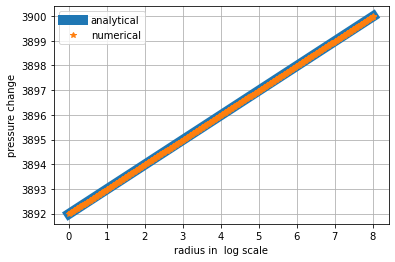

error at point 200 is=2.7284841053187847e-11 

When N=4000 for 1st implementation
[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[p0,p1,...,p4000]=[3891.97750305 3891.97950867 3891.9815143  ... 3899.99398313 3899.99598875
 3899.99799438]


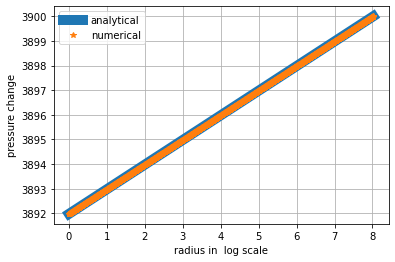

error at point 2000 is=0.0010028121819232183 

When N=4000 for 2nd implementation
[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -3.]]
[p0,p1,...,p4000]=[3891.97850586 3891.98051149 3891.98251711 ... 3899.99498594 3899.99699156
 3899.99899719]


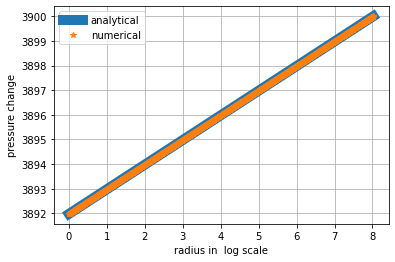

error at point 2000 is=6.320988177321851e-11 



In [2]:
def analytical(x,implementation,Pi,alpha,xe):
  return Pi+alpha*(x-xe)

def tri_diag(a, b, c, k1=-1, k2=0, k3=1):
  """ a,b,c diagonal terms
    default k-values for 4x4 matrix:
    | b0 c0 0  0 |
    | a0 b1 c1 0 |
    | 0  a1 b2 c2|
    | 0  0  a2 b3|
  """
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def SolveMatrixEquaion(N,implementation):
  # set simulation parameters
  alpha=1
  Pi=3900
  rw=0.328
  re=1000
  ye=np.log(re/rw)
  deltay=ye/N

  y=np.arange(0,ye,deltay)+deltay/2

  a=np.ones(N-1)
  b=-2*np.ones(N)
  c=np.ones(N-1)
  #lhs boundary condition
  b[0]=-1
  if implementation==2:
      b[N-1]=-3
  A=tri_diag(a,b,c)
  #rhs vector
  d=np.zeros(N)
  #rhs boundary condition
  d[0]=alpha*deltay
  if implementation==1:
    d[N-1]=-Pi
  else:
    d[N-1]=-2*Pi
  pn=np.linalg.solve(A,d)
  if implementation==1:
    print("When N=",N," for 1st implementation\n",A,"\n[p0,p1,...,p",N,"]=",pn,sep="")
  else:
    print("When N=",N," for 2nd implementation\n",A,"\n[p0,p1,...,p",N,"]=",pn,sep="")
  
  #analytical solution
  pa=analytical(y,implementation,Pi,alpha,ye)
  #view 
  plt.plot(y,pa,label='analytical',linewidth=10)
  plt.plot(y,pn,'*',label='numerical')
  plt.xlabel("radius in  log scale")
  plt.ylabel("pressure change") 
  plt.legend()
  plt.grid()
  plt.show()  

  #error
  Ni=N//2
  yi=y[Ni]
  err=np.abs(pn[Ni]-analytical(yi,implementation,Pi,alpha,ye))
  print("error at point " + str(Ni)+" is="+str(err),"\n")

SolveMatrixEquaion(4,1)
SolveMatrixEquaion(4,2)
SolveMatrixEquaion(40,1)
SolveMatrixEquaion(40,2)
SolveMatrixEquaion(400,1)
SolveMatrixEquaion(400,2)
SolveMatrixEquaion(4000,1)
SolveMatrixEquaion(4000,2)

* Does the numerical error scale as you expect in the two cases? Where do the errors originate from?

Yes we expected that the error would decrease as we are increasing the numbers of grids, but we did not expect that the error in not lazy case would be almost zero.

We think that the error comes from the discretization system, comparing that Pn in equation 20 and equation 22 for not lazy and lazy, we can clearly see that the error could be elimanted by taking into account this term $$p'(y_e)\frac{\Delta y}{2}\qquad\qquad$$.

Yes, specially when N is big (huge amounts of examples). And There is no error according to equation (1) $\frac{{\rm d}^2p}{{\rm d}y^2}(y)=0$.


# Exercise 2: Time-dependent solution  

The equations needed in the rest of the project:  
$$\frac{\partial p}{\partial t}=\eta\cdot\frac{e^{-2y_i}}{r_w^2}\cdot\frac{\partial^2 p}{\partial y^2}\qquad\qquad(10)$$  
$$\frac{\partial p}{\partial y}(y=y_w)=\frac{Q\mu}{2\pi hk}\qquad\qquad(11)$$  
$$p(y=y_e)=p_{init}\qquad\qquad(12)$$  
To capture how pressure changes in time, we go back to the original diffusivity equation. We apply the following implicit time-discreization  
$$\frac{p_i^{n+1}-p_i^n}{\Delta t}=\eta\cdot\frac{e^{-2y_i}}{r_w^2}\cdot\frac{p_{i+1}^{n+1}+p_{i-1}^{n+1}-2p_i^{n+1}}{\Delta y^2}\qquad\qquad(13)$$  

## Part 1.

* Show that for the special case N = 4, the matrix equation we need to solve each time step is:  
$$\underbrace{\begin{pmatrix} 1+\xi_0	\ & -\xi_0	 & 0 & 0 \\ -\xi_1 & 1+2\xi_1 & -\xi_1 & 0 \\ 0 & -\xi_2 & 1+2\xi_2 & -\xi_2 \\ 0 & 0 & -\xi_3 & 1+3\xi_3 \end{pmatrix}}_{A}\underbrace{\begin{pmatrix} p_0^{n+1} \\ p_1^{n+1} \\ p_2^{n+1} \\ p_3^{n+1} \end{pmatrix}}_{p^{n+1}}=\underbrace{\begin{pmatrix} p_0^n \\ p_1^n \\ p_2^n \\ p_3^n \end{pmatrix}}_{p^n}+\underbrace{\begin{pmatrix} -\beta\xi_0 \\ 0 \\0 \\ 2p_i\xi_{N-1} \end{pmatrix}}_{d} \qquad\qquad(11)$$  
where we have defined  
$$\xi_i\equiv\frac{\eta e^{-2y_i}\Delta t}{r_w^2\Delta y^2}$$  
and  
$$\beta\equiv\frac{Q\mu \Delta y}{2\pi k h}$$


> According to equation (13) and $\xi_i\equiv\frac{\eta e^{-2y_i}\Delta t}{r_w^2\Delta y^2}$:  
$$p_i^{n+1}-p_i^n=\xi_i\cdot (p_{i+1}^{n+1}+p_{i-1}^{n+1}-2p_i^{n+1})$$  
$$ -\xi_i\cdot p_{i+1}^{n+1}+(2\xi_i+1)\cdot p_i^{n+1}-\xi_i\cdot p_{i-1}^{n+1}=p_i^n$$  
$$\Downarrow$$  
$$ -\xi_0\cdot p_1^{n+1}+(2\xi_0+1)\cdot p_0^{n+1}-\xi_0\cdot p_{-1}^{n+1}=p_0^n$$  
$$ -\xi_1\cdot p_2^{n+1}+(2\xi_1+1)\cdot p_1^{n+1}-\xi_1\cdot p_0^{n+1}=p_1^n$$  
$$ -\xi_2\cdot p_3^{n+1}+(2\xi_2+1)\cdot p_2^{n+1}-\xi_2\cdot p_1^{n+1}=p_2^n$$    
$$ -\xi_3\cdot p_4^{n+1}+(2\xi_3+1)\cdot p_3^{n+1}-\xi_3\cdot p_2^{n+1}=p_3^n$$    
Due $N=4$ and equation (8), $p_N=p_4=2p_i-p_3^{n+1}$  
And central difference approximation to express the pressure at "the ghost node" $i = −1$ in terms of $p_0$:  
$\frac{\partial p}{\partial y}\bigg|_{y = 0}=\frac{p_0^{n+1}-p_{-1}^{n+1}}{\Delta y}+\mathcal O(\Delta y)=\frac{Q\mu}{2\pi hk}$  
$\Rightarrow p_{-1}^{n+1}=p_0^{n+1}-\beta$  
Hence:  
$$ -\xi_0\cdot p_1^{n+1}+(\xi_0+1)\cdot p_0^{n+1}=p_0^n-\xi_0 \beta$$  
$$ -\xi_1\cdot p_2^{n+1}+(2\xi_1+1)\cdot p_1^{n+1}-\xi_1\cdot p_0^{n+1}=p_1^n$$  
$$ -\xi_2\cdot p_3^{n+1}+(2\xi_2+1)\cdot p_2^{n+1}-\xi_2\cdot p_1^{n+1}=p_2^n$$  
$$ (3\xi_3+1)\cdot p_3^{n+1}-\xi_3\cdot p_2^{n+1}=p_3^n+\xi_3\cdot 2p_i=p_3^n+\xi_{N-1}\cdot 2p_i$$  
$$\Rightarrow\begin{pmatrix} 1+\xi_0	\ & -\xi_0	 & 0 & 0 \\ -\xi_1 & 1+2\xi_1 & -\xi_1 & 0 \\ 0 & -\xi_2 & 1+2\xi_2 & -\xi_2 \\ 0 & 0 & -\xi_3 & 1+3\xi_3 \end{pmatrix}\begin{pmatrix} p_0^{n+1} \\ p_1^{n+1} \\ p_2^{n+1} \\ p_3^{n+1} \end{pmatrix}=\begin{pmatrix} p_0^n \\ p_1^n \\ p_2^n \\ p_3^n \end{pmatrix}+\begin{pmatrix} -\beta\xi_0 \\ 0 \\0 \\ 2p_i\xi_{N-1} \end{pmatrix}$$  

In [3]:
class RadialDiffusivityEquationSolver:
    """
      A finite difference solver for the radial diffusivity equation.
      We use the coordinate transformation y = ln(r/rw) to set up and
      solve the pressure equation.
      The solver uses SI units internally, while "practical field units"
      are required as input.
      Except for the number of grid points and the choice of time step,
      all class instance attributes are provided with default values.
      Input arguments:
      name symbol unit
      --------------------------------------------------------------
      Number of grid points N dimensionless
      Constant time step dt days
      Well radius rw ft
      Outer reservoir boundary re ft
      Height of reservoir h ft
      Absolute permeability k mD
      Porosity phi dimensionless
      Fluid viscosity mu mPas (cP)
      Total (rock+fluid) compressibility ct 1 / psi
      Constant flow rate at well Q bbl / day
      Initial reservoir pressure pi psi
      -------------------------------------------------------------
    """ 
    
    
    def __init__(self,N,dt,rw=0.328,re=1000.0,h=8.0,phi=0.2,mu=1.0,ct=7.8e-6,Q=1000.0,k=500,pi=3900.0, t_final=4.5):
        
        # Unit conversion factors (input units --> SI)
        self.ft_to_m_ = 0.3048
        self.psi_to_pa_ = 6894.75729
        self.day_to_sec_ = 24.*60.*60.
        self.bbl_to_m3_ = 0.1589873
        # Grid
        self.N_ = N
        self.rw_ = rw*self.ft_to_m_
        self.re_ = re*self.ft_to_m_
        self.h_ = h*self.ft_to_m_
        # Rock and fluid properties
        self.k_ = k*1e-15 / 1.01325
        self.phi_ = phi
        self.mu_ = mu*1e-3
        self.ct_ = ct / self.psi_to_pa_
        # Initial and boundary conditions
        self.Q_ = Q*self.bbl_to_m3_ / self.day_to_sec_
        self.pi_ = pi*self.psi_to_pa_
        # Time control for simulation
        self.dt_ = dt*self.day_to_sec_

        self.alpha=self.Q_*self.mu_/(2*math.pi*self.h_ *self.k_)
        self.ye=np.log(self.re_/self.rw_)
        self.deltay=self.ye/self.N_
        self.y=np.arange(0,self.ye,self.deltay)+self.deltay/2
        self.eta=self.k_/(self.ct_*self.phi_*self.mu_)
        self.xi=self.eta*np.exp(-2*self.y)*self.dt_/(self.rw_**2*self.deltay**2)
        self.beta=self.alpha*self.deltay

        self.p_old=np.ones(self.N_)*self.pi_
        self.a=-self.xi[1:self.N_]
        self.b=1+2*self.xi
        self.b[0]=1+self.xi[0]
        self.b[-1]=1+3*self.xi[-1]    
        self.c=-self.xi[0:self.N_-1]
        self.A=self.tri_diag()
        self.t=0
        self.t_final=t_final*self.day_to_sec_

        self.ri_array = self.rw_*np.exp(self.y)

        #SParse Matrix Generation  #E3.2
        self.diagonals=np.zeros((3,self.N_))
    
        self.diagonals[0,:-1]= -self.xi[1:]
        #self.diagonals[0,1:2]= -self.xi[2]
        #self.diagonals[0,2:3]= -self.xi[3]
    
        self.diagonals[1,:]= (1+2*self.xi)           
        self.diagonals[2,1:]= -self.xi[:-1]
    
        self.diagonals[1,-1]= 1+3*self.xi[-1]
        self.diagonals[1,0]= 1+self.xi[0]
    
        self.A_sparse = sc.sparse.spdiags(self.diagonals, [-1,0,1],self.N_,self.N_,format="csc")
    
        #thomas algorithm
    
        self.main_diagonal=self.b

    def tri_diag(self, k1=-1, k2=0, k3=1):
        return np.diag(self.a, k1) + np.diag(self.b, k2) + np.diag(self.c, k3)

    def plotMatrix(self): #E2.2
        print(self.A)
    
    def solveMatrix(self,solvernr): #E3.2
        self.d=self.p_old
        self.d[0] = -self.beta*self.xi[0]
        self.d[-1] = 2*self.pi_*self.xi[self.N_-1]
        if solvernr==0:
            timer_start=timeit.default_timer()
            print("dense (numpy.linalg.solve):\n", np.linalg.solve(self.A, self.d))
            timer_stop=timeit.default_timer()
            print("Time of dense (numpy.linalg.solve):\n",timer_stop-timer_start)
        elif solvernr==1:
            timer_start=timeit.default_timer()
            print("SciPy (scipy.sparse.linalg.spsolve):\n",sc.sparse.linalg.spsolve(self.A_sparse, self.d))
            timer_stop=timeit.default_timer()
            print("Time of SciPy (scipy.sparse.linalg.spsolv:\n",timer_stop-timer_start)
        elif solvernr==2:
            timer_start=timeit.default_timer()
            self.solution = np.zeros_like(self.main_diagonal)
            # Forward elimination
            for k in range(1, len(self.d)):
                self.xmult = self.a[k-1] / self.main_diagonal[k-1]
                self.main_diagonal[k] = self.main_diagonal[k] - self.xmult*self.c[k-1]
                self.d[k] = self.d[k] - self.xmult*self.d[k-1]

           # Back-substitution
            self.solution[len(self.solution)-1] = self.d[len(self.solution)-1] / self.main_diagonal[len(self.solution)-1]
            for k in range(len(self.d)-2, -1, -1):
                self.solution[k] = (self.d[k]-self.c[k]*self.solution[k+1])/self.main_diagonal[k]
            print("Thomas algorithm:\n",self.solution)
            timer_stop=timeit.default_timer()
            print("Time of Thomas algorithm:\n",timer_stop-timer_start)
        else:
            print("Try again")

    def analytical(self,y):
        return self.pi_+self.alpha*(y-self.ye)

    def solve_time_old(self): #E2.3
        

        
        while self.t<self.t_final:
            self.solve()
            self.p_old=np.copy(self.pn)
            self.t +=self.dt_
            
    
    def solve_time(self):
        
        self.all_time=[]
        self.all_pressure=[]
        

        while self.t<self.t_final:
            self.solve()
            self.p_old=np.copy(self.pn)
            self.t +=self.dt_
            self.all_time.append(self.t)
            self.all_pressure.append(self.pn)
            
        
        self.all_time=np.array(self.all_time)
        self.all_pressure=np.array(self.all_pressure)
        
        #print(self.all_time)

    def solve(self):  #E2.3
        self.d=np.zeros(self.N_)
        self.d[0]=-self.beta*self.xi[0]
        self.d[-1]=2*self.pi_*self.xi[self.N_-1]
        self.d = self.d+self.p_old
        self.pn=np.linalg.solve(self.A,self.d)
        
    def calc_well_pressure(self):
        #P_well= self.pn[0] - self.deltay/2*self.alpha #exercise 4 part 2
        p0_time = self.all_pressure[:, 0]
        Pwell_time = p0_time - solver.beta*0.5
        #Pwell_current = Pwell_time[-1]
        #print("The actual observable  well pressure is:" + str(Pwell_current/self.psi_to_pa_) + " Psi")
        return self.all_time, Pwell_time
    

    def plot(self): #E2.3
        self.pa=self.analytical(self.y)
        plt.title("Pressure change time " + str(self.t/(24*60*60))+ " days")
        plt.plot(self.y,self.pn,"*", label="numerical n=" + str(self.N_))
        plt.plot(self.y,self.pa, label="analytical" )
        plt.xlabel("y")
        plt.ylabel("Pressure in Pascal")
        plt.legend()
        plt.grid()
        plt.show()
        self.Ni=self.N_//2
        self.yi=self.y[self.Ni]
        self.err=np.abs(self.pn[self.Ni]-self.analytical(self.yi))
        print("error at point " + str(self.Ni)+" is="+str(self.err),"\n")

    def line_source_solution(self, r, t): #E3.1
        return self.pi_+ ((self.Q_*self.mu_ * sc.special.expi(-r*r/(4*self.eta*t))/(4*np.pi*self.k_*self.h_)))

    def plot_pysical_coor(self):  #E3.1
        #self.solve()
        P_l=self.line_source_solution(self.ri_array,self.t)
        plt.plot(self.ri_array,self.pn/self.psi_to_pa_,label="numercail")
        plt.plot(self.ri_array,P_l/self.psi_to_pa_,label="Line source")
        plt.xlabel("Pysical coordinate")
        plt.ylabel("Pressure in Psi")
        plt.xscale("log")
        plt.grid()
        plt.legend()
    
    def plot_well_pressure(self, include_model=False, include_line_source=False): #exercise 4 part 3
        
        fig = plt.figure()
        
        # Data
        well_bhp =pd.read_csv('data/well_bhp.dat',sep='\t')
        time =well_bhp['time'].to_numpy()
        well_pressure= well_bhp['well_pressure'].to_numpy()
        plt.scatter(time, well_pressure, label='Data')
        
        if include_model:
            tw, pw = self.calc_well_pressure()
            plt.plot(tw/3600., pw/self.psi_to_pa_, label='Model')
        
        if include_line_source:
            tw, pw = self.calc_well_pressure()
            Pwell_line = self.line_source_solution(self.rw_, tw)/self.psi_to_pa_
            plt.scatter(tw/3600., Pwell_line)
        
        plt.title('Well data graph')
        plt.xlabel('Time')
        plt.ylabel('Well Pressure PSI')
        plt.grid()
        plt.legend()
        
R=RadialDiffusivityEquationSolver(4,0.01)



## Part 2. 
Again let N = 4. Assume default model input parameters, and that $\Delta t = 0$.01 day.

* Show that the matrix is (in SI units):  
$$\begin{pmatrix} 6.30844146e + 03	 & −6.30744146e + 03	 & 0.00000000e + 00 & 0.00000000e + 00 \\ −1.14232623e + 02 & 2.29465247e + 02 & −1.14232623e + 02 & 00.00000000e + 00 \\ 0.00000000e + 00 & −2.06884080e + 00 & 5.13768160e + 00 &−2.06884080e + 00\\ 0.00000000e + 00 & 0.00000000e + 00 & −3.74683004e − 02 & 1.11240490e + 00 \end{pmatrix}$$  

In [4]:
R1=RadialDiffusivityEquationSolver(4,0.01)
R1.plotMatrix()

[[ 6.30844146e+03 -6.30744146e+03  0.00000000e+00  0.00000000e+00]
 [-1.14232623e+02  2.29465247e+02 -1.14232623e+02  0.00000000e+00]
 [ 0.00000000e+00 -2.06884080e+00  5.13768160e+00 -2.06884080e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.74683004e-02  1.11240490e+00]]


##  Part 3.  

* Implement a simulator that solves the time-dependent problem for any choice of input parameters.

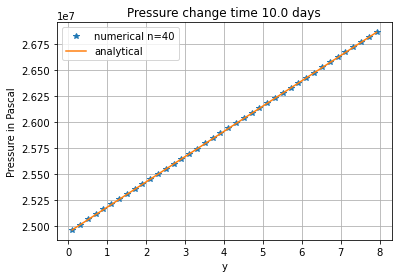

error at point 20 is=2971.427111182362 



In [5]:
time_solver=RadialDiffusivityEquationSolver(40,10)
time_solver.solve_time_old()
time_solver.plot()

# Exercise 3: Accuracy and performance

## Part 1.  


* Compare your numerical solution with the line-source solution given by equation (12). Do this for several values of N. To do the comparison you need to plot your solution in terms of the physical coordinates (i.e., $r(y) = r_we^y$).  
$$p(r,t)=p_i+\frac{Q\mu}{4\pi kh}\cdot\mathcal W(-\frac{r^2}{4\eta t})\qquad\qquad(12)$$

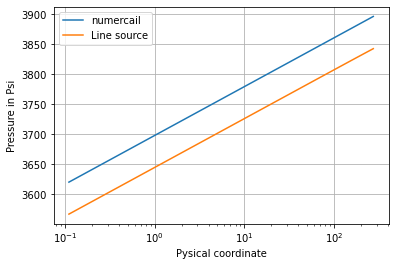

In [6]:
Line_numerical=RadialDiffusivityEquationSolver(40,0.01)
Line_numerical.solve_time_old()

Line_numerical.plot_pysical_coor()

## Part 2. 

Next, we want to take advantage of the symmetry of the problem. At run-time, the simulator should be able to choose between three different matrix solvers (dense (numpy.linalg.solve), sparse using SciPy (scipy.sparse.linalg.spsolve), and sparse using the Thomas algorithm).

* Use the %timeit option in Jupyter to evaluate the speed of each solver.  
* How large must N be in order to see a difference?

In [7]:
for i in range(3):
    R.solveMatrix(i)

dense (numpy.linalg.solve):
 [9153389.5103569  9642998.31043677 9981629.61715872 2147605.09177953]
Time of dense (numpy.linalg.solve):
 0.0004574250000004554
SciPy (scipy.sparse.linalg.spsolve):
 [9153389.51035691 9642998.31043678 9981629.61715872 2147605.09177953]
Time of SciPy (scipy.sparse.linalg.spsolv:
 0.010541422999999384
Thomas algorithm:
 [9153389.51035691 9642998.31043678 9981629.61715872 2147605.09177953]
Time of Thomas algorithm:
 0.00019401899999849093


> The fastest method is Thomas algorithm and N=4 is enough to see a difference.

# Exercise 4: Match model to well test data

In the final exercise we are going to study data from a well test. During a well test, the production engineer starts to produce from the reservoir, while monitoring how well pressure changes in time.

## part 1.

So far, we have calculated the pressure distribution inside the reservoir. The actual observable well pressure is missing from our calculations, but we can estimate it by discretizing equation (11).

* Use a first-order finite difference approximation to find a formula for the well pressure in terms of the well block pressure, $p_0$.

>According to equation (31) from the Exercise, we have:  
$$\frac{\rm d^2p}{\rm dy^2}\bigg|_{i}=\frac{ p_{i+1}^{n+1} + p_{i-1}^{n+1} - 2p_{i}^{n+1}}{\Delta 
y^2}+\mathcal O(\Delta y^2)$$  

And we know from equation(16) that $\frac{d^2p}{dy^2}=0$


Hence, we can find a formula for well prssure in terms of the well block pressure $P_0$ by applying the implicit time-discreization at grid point $P_w$ with setp-size $\frac{\Delta y}{2}$. We get:




$$\frac{p_0^{n+1} + p_{-1}^{n+1} - 2p_{w}^{n+1}}{(\frac{\Delta 
y}{2})^2}+\mathcal O(\frac{\Delta y}{2})^2=0$$ 

$$p_{0}^{n+1} + p_{-1}^{n+1} - 2p_{w}^{n+1} +\mathcal O(\frac{\Delta y}{2})^4=0 
\tag{14}
$$





And central difference approximation to express the pressure at "the ghost node" $i = w$ in terms of $p_{-1}$:  
$$\frac{\rm dp}{\rm dy}\bigg|_{y = w}=\frac{p_w-p_{-1}}{(\frac{\Delta 
y}{2})}+\mathcal O(\frac{\Delta y}{2})=\alpha$$  
$$\Rightarrow p_{-1}=p_w-\alpha\frac{\Delta y}{2}-\mathcal O(\frac{\Delta y}{2})
\tag{15}$$  

By inserting equation(15) into eeqaution(14), we get the following:

$$p_{0}^{n+1} - p_{w}^{n+1} - \alpha\frac{\Delta y}{2}-\mathcal O(\frac{\Delta y}{2})^4 -\mathcal O(\frac{\Delta y}{2})=0 
$$


Hence, the well pressure formula in terms of the well block pressure is:
$$p_{w}^{n+1}= p_{0}^{n+1} - \alpha\frac{\Delta y}{2}-\mathcal O(\frac{\Delta y}{2})^4 -\mathcal O(\frac{\Delta y}{2})
\tag{16}
$$

## Part 2.  

In [8]:
solver=RadialDiffusivityEquationSolver(4,0.01)
solver.solve_time()
t, pw = solver.calc_well_pressure()
print(f'The final well pressure is {pw[-1]/solver.psi_to_pa_} psi')

The final well pressure is 3616.7949067866393 psi


## Part 3.

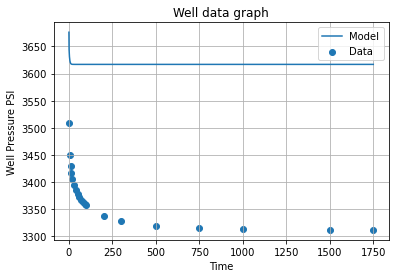

In [9]:
#A=RadialDiffusivityEquationSolver(4,0.01)
A=RadialDiffusivityEquationSolver(4, 0.01,t_final=1750/24) 
A.solve_time()
A.plot_well_pressure(include_model=True, include_line_source=False)



##  Part 4

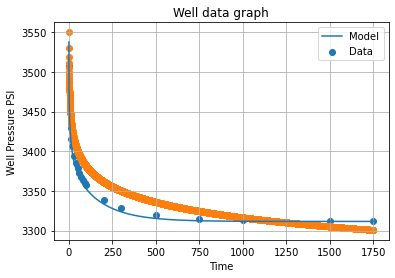

In [10]:
B=RadialDiffusivityEquationSolver(40, 0.01,k=315,re=7200,t_final=1750/24) #exercise 4.part 4
B.solve_time()
B.plot_well_pressure(include_model=True, include_line_source=True)



## Part 5

From part 4 in this exercise we found that $r_e=7200 ft$. We can calculate the total volume of water by assuming that the reservoir has a cylindrical shape:

The water volume forluma is :

$V_{water}= (r_e - r_w)^2.\pi.h.\phi$

$r_w$= 0.328 ft

Thus, the total volume of water is:

$V_{water}= (7200-0.328)^2*\pi8*0.2$= $260552520 ft^3$ ≈ $7.38*10^6 m^3$



## Conclusion and Discussion  

It is amazing how python can be such as useful tool to solve almost any kind of problem, its reach depends actually on how you see the things and how you can analyze them. 

Through this assignment, we are familiar with the way of combining markdown and code to write reports. During these two weeks, we reviewed how to implement a certain function and classes in different ways by python, numerical round-off and truncation errors and scientific computing, which are showed in the course. 
From the project we learnt about the main libraries and its main functions and how when we apply our knowledge and our analyze-skill we can solve problems in efficient ways. Also, we learnt that there are some methods that help us to calculate derivates in easy ways but there is still an error that we should quantify and take it into account, so we take good decisions based on that.

Finally, we land all the knowledge that we got from initial exercises and used it to understand the base of data provided in order to get to know how much ice can get melt from the Antarctic if the climate-change keep its fast pace.
It is quiet surprising that the sea level will rise 68 meters if the Arctic glacier melts completely. It is hard to imagine how many places will be submerged by a 68-meter rise in sea level. I hope that future exercises will have more opportunities to come into contact with these open resources, so that people can more intuitively understand the current status of the earth, instead of following the media to do meaningless emotional catharsis.

There are some limitations on this due to we are not taking all the variables that could be present here, but at least give us a clear view of what could happen if we do not to something about this.


## Self-Reflections  

**Armin Sabri** – Since my background is Petroleum Engineering  and I might face these type of problems in my professional carrer. I founded really interested knowing how to solve this kind of problems, which were can be formulated from very basic equations and transformed into systems that can be solved taking into account many variables that could affect the outcomes. But also I liked learnt how to code this situation in a programming language so the solution can be efficient modified as we get more information, so I enjoyed doing this project and I would like to learnt more about the application of this methods so I can take a more wide-vision of the applications of these new topics. As a comment it was hard to code, we got a lot of errors during code but at the end of the point we learnt.

**Reynel Villabona** – I founded really interesting but also hard to understand how the diffusity equation can be solved for many applications like the change of the temperature, I would like to see how other variables can be introduced in the system as long as we got more relevant information. Also I consider myself as a person who likes to see everything in its real-life application so it is easier for me to understand and land my ideas. I would like to keep understanding more about modelling cause I would like to join the Drillbotics team of Uni, since I like how we can predict behaviors so we can lay out efficient solutions in an anticipated manner. I found really useful the laboratory sessions cause is an space where our doubts can be solve, if we get stuck in one part also to get help regarding the coding.

# References
  [0] Python. What is Python? Executive Summary. https://www.python.org/doc/essays/blurb/.  
  [1] Python docs. sys — System-specific parameters and functions. https://docs.python.org/3/library/sys.html.  
  [2] BBC news. https://www.bbc.com/news/health-51674743